In [54]:
import PIL
from PIL import Image, ImageDraw
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Users\User\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

img = Image.open('textimage.png')


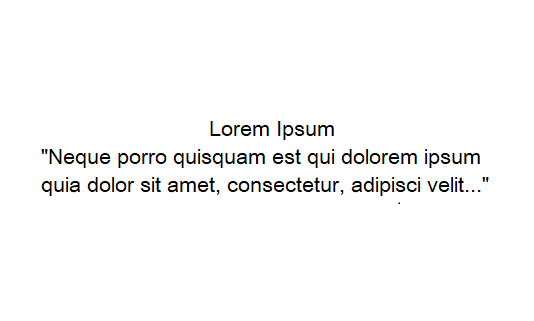

In [2]:
display(img)

In [5]:
dir(pytesseract)

['ALTONotSupported',
 'Output',
 'TSVNotSupported',
 'TesseractError',
 'TesseractNotFoundError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'get_languages',
 'get_tesseract_version',
 'image_to_alto_xml',
 'image_to_boxes',
 'image_to_data',
 'image_to_osd',
 'image_to_pdf_or_hocr',
 'image_to_string',
 'pytesseract',
 'run_and_get_output']

In [7]:
help(pytesseract.image_to_string)

Help on function image_to_string in module pytesseract.pytesseract:

image_to_string(image, lang=None, config='', nice=0, output_type='string', timeout=0)
    Returns the result of a Tesseract OCR run on the provided image to string



In [10]:
text = pytesseract.image_to_string(img)
print(text)

Lorem Ipsum
“Neque porro quisquam est qui dolorem ipsum
quia dolor sit amet, consectetur, adipisci velit..."



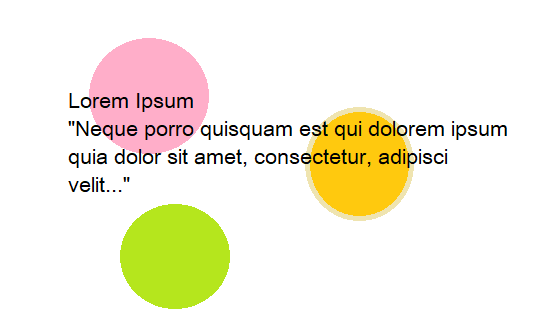

In [12]:
noisyimg = Image.open('noisytextimage.png')

display(noisyimg)

In [13]:
text = pytesseract.image_to_string(noisyimg)
print(text) ## Doesn't print all the text due to noise

Lorem Ipsum
“Neque porro quisquam e: rem ipsum
quia dolor sit amet, cons isci

velit.

 



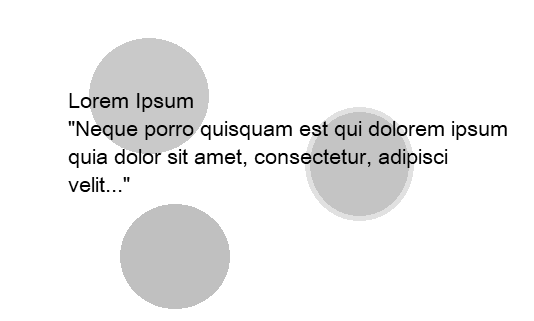

Lorem Ipsum

“Neque porro quisquam est qui dolorem ipsum
quia dolor sit amet, consectetur, adipisci
velit..."

 

 



In [15]:
newnoisyimg = noisyimg.convert('L')

text = pytesseract.image_to_string(newnoisyimg)
display(newnoisyimg)
print(text)

In [16]:
## Binarization

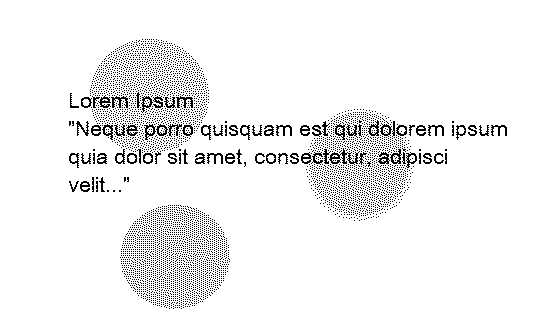

   
 

quia dolor'sit amet, cons
velit...”

 



In [18]:
binnoisyimg = noisyimg.convert('1')
text = pytesseract.image_to_string(binnoisyimg)
display(binnoisyimg)
print(text)


In [35]:
def fun(value,threshold):
    if value>threshold:
        value = 255
    else:
        value = 0

def binarize(image, threshold):
    output = image.convert('L')
    output = output.point(lambda x: x > threshold and 255)
    return output

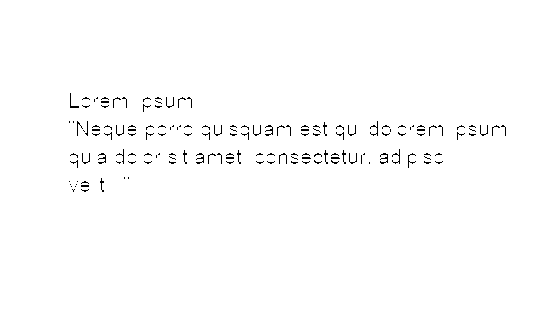

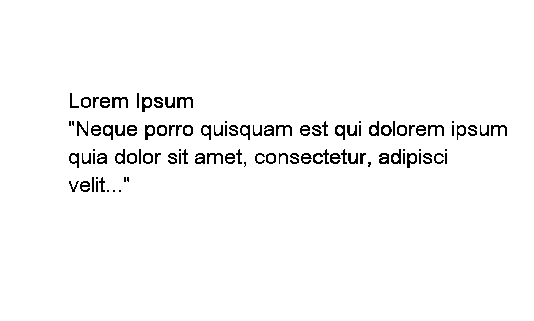

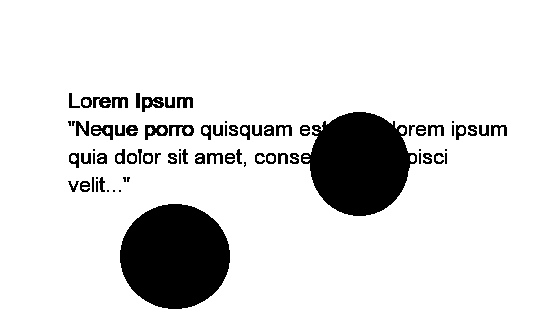

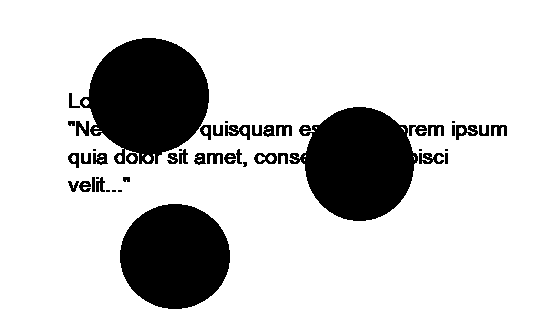

In [45]:
display(binarize(noisyimg, 0))
display(binarize(noisyimg, 150))
display(binarize(noisyimg, 200))
display(binarize(noisyimg, 250))

In [43]:
text = pytesseract.image_to_string(binarize(noisyimg, 150))
print(text)


Lorem Ipsum

“Neque porro quisquam est qui dolorem ipsum
quia dolor sit amet, consectetur, adipisci
velit..."

 

 



In [48]:
iitimg = Image.open('iit.png')

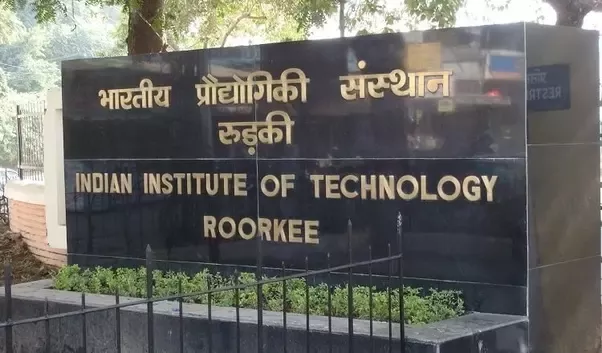

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=602x353 at 0x1A6E028E760>


In [52]:
display(iitimg)
print(iitimg)

In [51]:
text = pytesseract.image_to_string(iitimg, lang='eng+hin')
print(text) # Does not work very well

   

    

 

INDIAN INSTITUTE OF TECHNOLOGY
Tee) (13 {

  
 



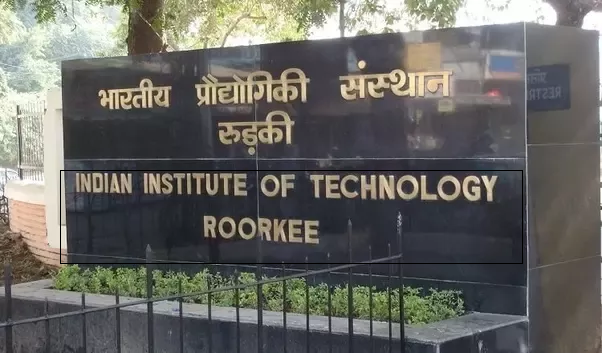

In [59]:
iitc = iitimg.copy()
drawer = ImageDraw.Draw(iitc)
drawer.rectangle((60,170,522,263),fill=None,outline='black')
display(iitc)

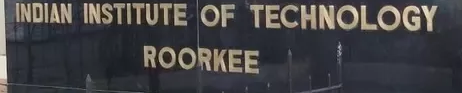

In [60]:
englogo = iitimg.crop((60,170,522,263))
display(englogo)

In [61]:
text = pytesseract.image_to_string(englogo)
print(text)

INDIAN INSTITUTE OF TECHNOLOGY
ROORKEE |



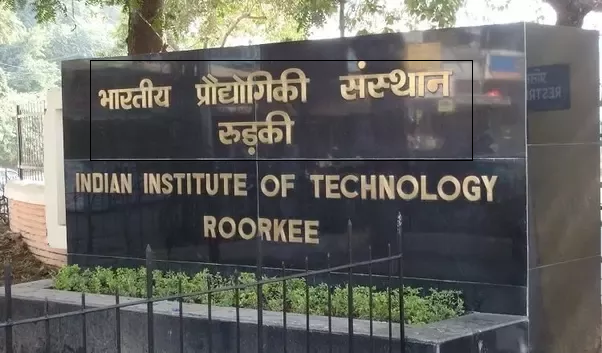

In [68]:
iitc = iitimg.copy()
drawer = ImageDraw.Draw(iitc)
drawer.rectangle((90,60,472,160),fill=None,outline='black')
display(iitc)

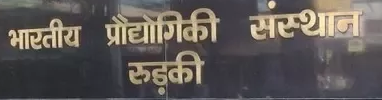

In [73]:
hinlogo = iitimg.crop((90,60,472,160))
display(hinlogo)
